# Tutorial 4: Curve Fitting

[v 2023-02-01]
Developed by Megan Renz for Cornell Physics Labs. [Adapted by L.A. Bumm 2022-09-16]

Reminder: the code cells throughout this tutorial will build off of previous code cells. It is important to run every code cell <SHIFT + ENTER> in the document, in order, up to the point where you are working every time you open this tutorial. If you get an error message (particularly one that says that a particular variable is not defined) after attempting to run a code cell, first make sure that you have run every previous code cell. 

Oftentimes, we will want to figure out the relationship between two variables, i.e., $x$ and $y$, as a function: $f(x)=y$. The most common question will be if the relationship between $x$ and $y$ is linear; in this case, we need to also figure out what the slope and intercept of that line should be.  

Let's say we have some data, which we want to plot as $y$ vs $x$ and find out if the relationship between them is linear.  

Below we have a graph where the data are the blue dots and the solid red and dotted green lines show two attempts to fit the data. Run the block below. 

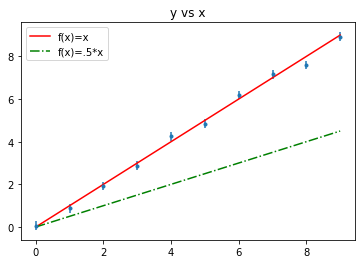

In [1]:
#this is some imports you don't need to worry about.  
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import *


#Again, don't worry too much about this code, just creating an example.  
x=np.arange(10)
y=np.arange(10)+np.random.random(10)-.5
plt.figure()
plt.errorbar(x,y, np.ones(10)*.2, fmt='.')
plt.plot(x,x,'r', label="f(x)=x")
plt.plot(x,.5*x, 'g-.', label="f(x)=.5*x")
plt.title("y vs x")
plt.legend()
plt.show()

### 1. Which one of the two lines above seems like a better fit to the data? Please explain your reasoning. (0.5 points)

> The **red solid line**, $f(x) = x$, is the better fit as it follows the blue data points more closly then the green dotted line.  

Most of the time, the difference between possible fit lines will be a bit more subtle. In these cases, we want to come up with a way to make our goodness-of-fit assessment quantitative instead of qualitative.  To do that, we are going to use our data and our function and come up with a number or "score" that tells us if our fit is good or bad.  

When the score is small, our fit is good, and when the score is large, our fit is bad.  


We want to take several things into account:  

1.  The score should increase as the points get further away from the function, by our definition above.
2.  We want points with smaller uncertainties to "count" more towards the score; if the function is far away from a point with a small uncertainty, our fit is worse than if the function is far away from a point that has large uncertainty.   
3.  Our score should not depend on units. That is, we want the score to be dimensionless so we can have a standard way of interpreting a "good" or "bad" fit, regardless of the units in our data.
4.  Our score should not change as we add more points that are similar to the ones we already have. That is, we want a standard way of interpreting a "good" or "bad" fit, regardless of the number of data points.


While there are many ways to assess how well a curve fits data, the method that we will use here is called Chi-Squared ("chi" is pronounced like "sky", but without the 's'):


$$\chi^2=\frac{1}{N} \sum_{i=1}^N \frac{(f(x_i)-y_i)^2}{\delta y_i^2}$$

where we have data points $(x_1, y_1) ... (x_N, y_N)$ with associated uncertainties $\delta y_i$, and $f(x_i)$ is the function we are fitting evaluated at $x_i$. In the graph above, the red and green lines are examples of possible functions $f(x)$.



### 2. Explain how the formula for $\chi^2$ fulfills the four requirements above. (0.5 points)


>1.  The difference of $(f(x_i)-y_i)^2$ defines how the score increases as points get further away, no matter the direction. 
>2.  Using $\delta y_i^2$ as the denominator ensures the weight of points with smaller uncertainties is greater than those with significant uncertainty.  
>3.  This divides the square of the units by the square of the units and cancels out to ensure a unit-less score. 
>4.  Using $\frac{1}{N}$ ensures any number of additional, and similar, points **do not** significantly change the score.



$\chi^2$ is written as a python function below. Run the code block below.

In [2]:
def chiSquared(x, y, dy, f, args):
    '''Function Chi-Squared.  
    x, y and dy are numpy arrays, referring to x, y and the uncertainty in y respectively.
    f is the function we are fitting. 
    args are the arguments of the function we have fit.  
    '''
    return 1/(len(x)-len(args))*np.sum((f(x, args)-y)**2/dy**2)

### 3. Compare the equation for $\chi^2$ to the equation for $t^{\prime}$ from the last homework tutorial. In what ways are the equations similar and in what ways are they different? (0.25 points)

> The similarities are that they both incorporate the uncertainties in the denominator.

> The difference is that the $\chi^2$ is able to negate outliers with significantly larger uncertainties than other points. While the $t^{\prime}$ equation measures the difference of the means in relation to their uncertainties.

### 4. What might a small $\chi^2$ value mean? What should count as "small"? (0.25 points)

> The small $\chi^2$ score means that the fit is very close to the data. This would be approximately $\chi^2 \leq 1$.

### 5. What might a large $\chi^2$ mean?  What should count as "large"? (0.5 points)

> A large $\chi^2$ score means that the fit is **not** good and either the parameters or the best-fit formula itself needs to be changed. 

 Below are a few example functions one can fit.  We will most often be fitting a line. Run the code block below. (You do not need to worry about the details)

In [3]:
def poly(x, args):
    '''
    returns the value of the polynomial sum (x**i*args[i])
    '''
    total=x**0*args[0]
    for i in range(1,len(args)):
        total+=x**i*args[i]
    return total
def linear(x, args):
    '''
    A special case of Poly.  
    '''
    return args[0]+x*args[1]


Let's take a look at fitting a line to some data.  

Here we have some data of an experiment in which a spring is stretched and the spring's force ($y$) is measured at certain stretching distances ($x$). Run the code below, which will produce two graphs.

The first is a graph of the data points (black dots with uncertainty bars) and a fit line (in blue). The second is a *residuals* plot, which shows the difference between $f(x_i)$ (the value of our function at $x_i$) and $y_i$ (the measured data at $x_i$) at each $x_i$.  

In [4]:
y=np.array([ 1.36,  3.36,  3.92,  4.11,  3.43,  5.22,
  8.29,  8.22, 11.15, 10.86])
uncertainty=np.ones(10)
uncertainty[4]=4
x=np.linspace(1,8,10)

def update(intercept=0,slope=1):
    fx=linear(x,[intercept, slope])

    fig, ax=plt.subplots(1,2, figsize=(8,4))
    ax[0].set_title("force vs extension")
    line,=ax[0].plot(x,linear(x, [0,1]))
    data=ax[0].errorbar(x,y, uncertainty, fmt='.k')
    ax[1].set_title("residuals")
    residuals=linear(x,[0, 1])-y
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
#    plt.show()
    
    line.set_ydata(fx)
    residuals=fx-y
    ax[1].cla()
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    ax[1].set_title("Residuals")
    ax[1].set_xlabel("extension (cm)")
    ax[1].set_ylabel("f(x) - y")
    ax[0].set_xlabel("extension (cm)")
    ax[0].set_ylabel("force (N)")
#    fig.canvas.draw_idle()
#    plt.show()
    fig.show()       

    print("chi-squared value:  ")
    print(chiSquared(x,y, uncertainty, linear, [intercept, slope]).round(3))
interact(update, intercept=(-5, 20, .1), slope=(-1, 10, .1));

interactive(children=(FloatSlider(value=0.0, description='intercept', max=20.0, min=-5.0), FloatSlider(value=1…

Try adjusting the slope and intercept of the line above using the sliders. Watch how the chi-squared value changes as the line becomes a better or worse fit.

You can also adjust the slope and intercept values by clicking the numbers to the right of the sliders and typing in your desired value.

### 6. What happens as you change the values for the slope and intercept? (0.5 points)

> The best-fit line changes and as a result the $\chi^2$ score can be changed to find the parameters that create the best fit. 

### 7. What values for the slope and intercept give the smallest value of $\chi^2$ (to the first decimal place)? (0.5 points)

> $Intercept=0.4$ & $slope=1.3$, yields what I found to be the smallest $\chi^2$ score of $0.762$. 

### 8. How confident are you that the line you fit is a good representation of the underlying phenomena? (One way to check this is to see if any other lines look like better fits, qualitatively.) (0.5 points)

> The line of $Intercept=0.4$ & $slope=1.4$ looks like it could be a slightly better fit qualitatively. However, I am pretty confident that my original best-fit line is a good representation of the phenomena.

This brings us to another question - what if our $\chi^2$ is really small?  (This is a rhetorical question).  Run the code block below.  

In [5]:

largeUncertainty=uncertainty*5

def update(intercept=0,slope=1):
    fig, ax=plt.subplots(1,2, figsize=(8,4))
    ax[0].set_title("force vs extension")
    line,=ax[0].plot(x,linear(x, [0,1]))
    data=ax[0].errorbar(x,y, largeUncertainty, fmt='.k')
    ax[1].set_title("residuals")
    residuals=linear(x,[0, 1])-y
    res=ax[1].errorbar(x,residuals, largeUncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    #plt.show()
    fx=linear(x,[intercept, slope])
    line.set_ydata(fx)
    residuals=fx-y
    ax[1].cla()
    res=ax[1].errorbar(x,residuals, largeUncertainty, fmt='.k')
    ax[1].set_title("residuals")
    ax[1].grid(True, which='both')
   # fig.canvas.draw_idle()
    fig.show()
    print("chi-squared value:  ")
    print(chiSquared(x,y, largeUncertainty, linear, [intercept, slope]).round(3))
interact(update, intercept=(-5, 12, .2), slope=(0, 5, .1));







interactive(children=(FloatSlider(value=0.0, description='intercept', max=12.0, min=-5.0, step=0.2), FloatSlid…

Now you should have a large range of values for which the $\chi^2$ value is quite small. For example, a fit with intercept=-4.6 and slope=2.2 and one with intercept=3.2 and slope=.6 both give $\chi^2$ values around 0.2. *Reminder:  You can enter values into the boxes next to the sliders!*


### 9. How confident are you that either of these sets of fit parameters are a good representation of the underlying phenomena?  Do you trust them?  (0.5 points)


> I am fairly confident that first set, intercept=-4.6 and slope=2.2, is a decent best-fit. However, the intercept=3.2 and slope=.6 line does not appear to be near any points even though the $\chi^2$ value is around 0.2. I trust the first set but not the latter. 

If your $\chi^2$ is too small (e.g. $\chi^2 <<1$), you may have overestimated your uncertainties. That is, your fit is telling you that you measured these data points much more precisely than you thought! Uncertainty overestimation is a problem because it means that it is hard to identify which of the lines that appear to be a good fit actually reflect the underlying physics.   


### 10. What do you think you should do if you obtain a very small $\chi^2$ value? (0.5 points)

> The best-fit line should be examined along with the uncertainties as there could be errors in overestimating the uncertainties.

A $\chi^2$ value larger than 9 is considered a very poor fit for the data. (Why 9?) 

For $\chi^2$, there are a few possible outcomes:  

1. $\chi^2\approx1$
2.  $\chi^2<<1$
3.  $1\lesssim\chi^2<9$
4.  $\chi^2 >9$

### 11. Write down different interpretations for what each of these $\chi^2$ values could mean, and what you should do in each case.  *Hint: refer to the interpretations of values of $t^\prime$ from the previous tutorial.* (1 point)

> 1. The best-fit line should be examined to see if it is also qualitatively representing the data. If this is the case then this would be a **good** best-fit line. If **not** the parameters could be adjusted to find a better fit. 

> 2. The best-fit line should be examined along with the uncertainties as there could be errors in overestimating the uncertainties. The experimenter could also re-examine measurement procedures for errors to ensure uncertainties are correct. 

> 3. The best-fit line parameters could be adjusted in order to find a better fit, but if the $\chi^2$ score is still close to $1$ then the line could still qualitatively represent the data accurately. 

> 4. The best-fit line parameters **need** to be adjusted in order to find a better fit.


#### <span style='color:Red'>*You should never manipulate your uncertainties to obtain a specific $\chi^2$ value. Your uncertainties should always reflect your real measurements.*</span>

Now let's investigate the graph called "Residuals".  This is a graph of $f(x_i)-y_i$, the difference between what our fit predicts and what we actually got during the experiment.  The x-axis is the same as the graph "force vs. extension", but the y-axis is the vertical distance between the line and points. 

### 12. Given how you expect points to be distributed around the line, what do you expect to see in your residuals graph, if $f(x_i)$ is a good fit? (1 point)

> The residuals in the graph should be close to zero if the line is a **good** fit. 

Looking at the residuals graph is a good way to tell if you are trying to fit the right kind of function. The $\chi^2$  value does not necessarily tell the whole story.

Run the code below, and adjust the slider to slope=5, intercept=-17.



While the $\chi^2$ value tells us that this fit is bad (large $\chi^2$), the residual graph can give us an idea about *why*. In this case, the residuals show a linear trend and tells us that the first half of the data points are systematically above the line and the second half are systematically below the line. This should clearly suggest that you should change the slope of the line!

Let's try another example.



In [6]:
y=np.array([ 1.36,  3.36,  3.92,  4.21,  5.43,  6.22,
  8.29,  8.22, 10.15, 10.86])
y=.5*(y-2)**2
uncertainty=np.ones(10)
uncertainty[4]=4
x=np.linspace(1,8,10)


def update(intercept=-17,slope=5):
    fig, ax=plt.subplots(1,2, figsize=(8,4))
    ax[0].set_title("force vs extension")
    line,=ax[0].plot(x,linear(x, [0,1]))
    data=ax[0].errorbar(x,y, uncertainty, fmt='.k')
    ax[1].set_title("residuals")
    residuals=linear(x,[0, 1])-y
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    #plt.show()
    
    fx=linear(x,[intercept, slope])
    line.set_ydata(fx)
    residuals=fx-y
    ax[1].cla()
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    ax[1].set_title("Residuals")
    ax[0].set_xlabel("extension (cm)")
    ax[0].set_ylabel("force (N)")
    #fig.canvas.draw_idle()
    fig.show()
    print("chi-squared value:  ")
    print(chiSquared(x,y, uncertainty, linear, [intercept, slope]).round(3))
interact(update, intercept=(-20, 20, .1), slope=(-1, 10, .1));



interactive(children=(FloatSlider(value=-17.0, description='intercept', max=20.0, min=-20.0), FloatSlider(valu…

In this case, the residuals show an upside down "v".

### 13. What do you think this shape of residuals might suggest about your fit? How might you change the function to get a better fit? (0.5 points)

> The residuals show that the equation of the line may be wrong. In this case, it seems that a curved fit would be better, possibly an exponential growth.

Let's practice writing your own code to fit a function to some data manually below.  

For example, let's say you stretch a string to the same extension multiple times and measure the force required each time.  

First, I have created some sample data, which is 10 extensions (in cm) of the spring (stored in x), and a matrix of 10 rows and 5 columns, where each row is the forces (in N) measured for 5 trials.  

Each of the 10 rows corresponds to one of the extension values, in order. Notice that as extension increases, force increases. Within each row, there is no clear trend because each row displays the same measurement taken five times at that extension. 

### 14. Print out the measurements of the extensions and forces in a matrix. Why are the number of values in "extensions" equal to the number of rows in "forces"? What are the units of all the values in "extensions"? What are the units of all the values in "forces"? (1.5 points)

> The extensions vary over each row, which is why their numbers coincide. Similarly, each column represents the separate trials. 

> The units of the extensions are centimeters & the units of the forces are Newtons. 

In [7]:
extensions=np.linspace(0,9, 10)
forces=np.random.normal(0,.5,size=(5,10))
forces=forces+extensions[None,:]
forces=forces.T

print("extensions: \n", extensions)
print("forces: \n",forces)


extensions: 
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
forces: 
 [[ 9.49152548e-01  1.74822581e-02 -4.61195102e-01 -1.61286915e-01
   9.37015009e-03]
 [ 1.08770208e+00  7.30887620e-01  1.17259135e+00  1.13696984e+00
   6.49775834e-01]
 [ 1.60778807e+00  2.68870462e+00  1.49872009e+00  2.30910284e+00
   1.21743038e+00]
 [ 2.29404738e+00  2.71765346e+00  3.92459921e+00  3.20251754e+00
   3.75045394e+00]
 [ 4.30864542e+00  3.62434595e+00  4.10316113e+00  3.57729680e+00
   3.00239721e+00]
 [ 4.74216815e+00  5.65256847e+00  5.49725704e+00  5.12717378e+00
   5.20947309e+00]
 [ 5.71712700e+00  6.67007795e+00  5.77063580e+00  5.96652788e+00
   5.92960410e+00]
 [ 6.49506753e+00  6.23950526e+00  7.46682713e+00  6.78357611e+00
   6.92063947e+00]
 [ 7.55887648e+00  7.91509251e+00  7.36043754e+00  8.32319239e+00
   6.98798852e+00]
 [ 9.13480230e+00  8.03403596e+00  9.59581195e+00  9.78619953e+00
   8.87804449e+00]]


We do not want to plot all 50 data points in the table above. Instead, we want to average the 5 data points for each extension, so that we are only plotting 10 data points (with a clear trend). The uncertainty in the mean should be used to make the errorbars.  

As a hint, take a look at the code below:  



In [8]:
numpyExample=np.array([[1,2],[3,4], [5,1]])
print(numpyExample)
print("summing over axis=0:")
print(np.sum(numpyExample, axis=0))
print("summing over axis=1:")
print(np.sum(numpyExample, axis=1))

[[1 2]
 [3 4]
 [5 1]]
summing over axis=0:
[9 7]
summing over axis=1:
[3 7 6]


Note: When using functions in *numpy*, you can specify whether you want to take the average across the row or the column using <span style='font-family:Courier'>axis = 1</span> or <span style='font-family:Courier'>axis = 0</span> respectively.  This also works for <span style='font-family:Courier'>np.sum</span> and other functions.



We will need to average the five trials together for each extension of the spring, and put that in $y$, and find the uncertainty in the force measurement for each extension of the spring, and put that in $dy$. 

Your final answer for both $y$ and $dy$ should be a vector of length 10.  

### 15. Fill in the three '...' below to create an array for the mean force measurements for each extension of the spring, $y$, and their uncertainties, $dy$.  (1.5 points)
  
[1.] Check that *y* and *dy* are what you expect (particularly check the number of data points). 
> Yes as there are 10 values for each extension in both y & dy. 

[2.] Manually check the first value (corresponding to extension=0 for each). 

> Manually taking the values for and checking by hand shows this is correct:
\begin{align*}
 \text{For extension=0  }:& -0.25329851,  0.92804241,  0.22524116, -0.83976684, -0.2905438\\
 \\
 mean =& \frac{-0.25329851+  0.92804241+  0.22524116+ -0.83976684+ -0.2905438}{5}\\
 \\
 &mean = -0.04606511600000003\\
 \\
 & \sigma = 0.5924813078581521 \text{ found using code} \\
 \\
 & \text{standard uncertainty of the mean} = \frac{0.59248130}{\sqrt{5}}\\
 \\
 & \text{standard uncertainty of the mean} = 0.2649656924394892
\end{align*}

In [9]:
check = np.array([-0.25329851,  0.92804241,  0.22524116, -0.83976684, -0.2905438])
np.std(check)

0.5924813078581521

In [10]:
y=np.mean(forces, axis=1) #Take the mean of each of the sets of 5 trials in "forces".  

#Note: When using functions in numpy, you can specify whether you want to take the average across the row or the 
#column using axis= 1 or 0 respectively.  This also works for np.sum and other functions.

print("y:")
print(y)
dy=np.std(forces, axis=1)/np.sqrt(forces.shape[1]) #Calculate the standard uncertainty of the mean for each of the sets of 5 trials in "forces". 
#divide by square root of number of trials in each set to get the uncertainty.  
print("dy:")
print(dy)


y:
[0.07070459 0.95558534 1.8643492  3.17785431 3.7231693  5.24572811
 6.01079455 6.7811231  7.62911749 9.08577885]
dy:
[0.21118738 0.0982762  0.24457145 0.27415368 0.20373839 0.14109969
 0.15324789 0.18599339 0.20510395 0.27585814]


Now let's plot what we just made, and try fitting it. Run the code block below. 

> A **good** best-fit line was found with intercept:-1.0 & slope: 1.2

In [11]:

uncertainty=dy 
def update(intercept=0,slope=1):
    
    fig, ax=plt.subplots(1,2, figsize=(8,4))
    ax[0].set_title("force vs extension")
    line,=ax[0].plot(x,linear(x, [0,1]))
    data=ax[0].errorbar(x,y, uncertainty, fmt='.k')
    ax[1].set_title("residuals")
    residuals=linear(x,[0, 1])-y
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    #plt.show()
    
    fx=linear(x,[intercept, slope])
    line.set_ydata(fx)
    residuals=fx-y
    ax[1].cla()
    res=ax[1].errorbar(x,residuals, uncertainty, fmt='.k')
    ax[1].grid(True, which='both')
    ax[1].set_title("Residuals")
    #fig.canvas.draw_idle()
    fig.show()
    print("chi-squared value:  ")
    print(chiSquared(x,y, uncertainty, linear, [intercept, slope]).round(3))
interact(update, intercept=(-2, 12, .2), slope=(0, 5, .1));






interactive(children=(FloatSlider(value=0.0, description='intercept', max=12.0, min=-2.0, step=0.2), FloatSlid…

Save your notebook with all your answers to the questions, modified code cells, and output from each code cell. Submit your notebook by uploading it to the Canvas assignment.